# Reliability and Data quality (1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from random import *

In [2]:
# Load our dataset into memory

df = pd.read_csv("speeches/data.csv")

In [3]:
# Inespecting the dataset

df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat


In [4]:
# Does the number of data point match our expectation?
print(df.shape)

(250, 6)


In [5]:
# The dataframe has 250 rows which corresponds to 108 State of the Union + Inaugural Address Speeches
# The Name,Date,Speech,Type and Party columns do exist as setup in the crawling part.

In [6]:
# Visualizing a random sample of rows of df

df.sample(3)

,Unnamed: 0,Name,Date,Speech,Type,Party
123,123,Benjamin Harrison,"December 01, 1890",To the Senate and House of Representatives:\nT...,State of the Union,Republican
116,116,Grover Cleveland,"December 03, 1894",To the Congress of the United States: The asse...,State of the Union,Democrat
249,249,George Washington,"April 30, 1789",Fellow Citizens of the Senate and the House of...,Inaugural Address,Federalist


In [7]:
# Visualizing the content of three random speeches (which are only shown partially above):

for i in [1,2,3]:
    print(df.loc[randint(0, 107)]["Speech"])


      
      Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, neighbors, and friends:
There is a man here who has earned a lasting place in our hearts and in our history. President Reagan, on behalf of our nation, I thank you for the wonderful things that you have done for America.
I've just repeated word for word the oath taken by George Washington 200 years ago, and the Bible on which I placed my hand is the Bible on which he placed his. It is right that the memory of Washington be with us today not only because this is our bicentennial inauguration but because Washington remains the Father of our Country. And he would, I think, be gladdened by this day; for today is the concrete expression of a stunning fact: our continuity, these 200 years, since our government began.
We meet on democracy's front porch. A good place to talk as neighbors and as friends. For this is a day when our nation

In [8]:
# -> Content of the speeches looks fine and complete!

In [23]:
## Count Nan values
df.apply(lambda x: x.isna().sum())

Unnamed: 0    0
Name          0
Date          0
Speech        0
Type          0
Party         0
dtype: int64

In [10]:
# No Nan values in Name,Date,Speech, Type and Party!

In [21]:
# Inspecting the length of the speeches

length = []

for i in range(0,250):
    print(len(df.loc[i]["Speech"]))
    length.append(len(df.loc[i]["Speech"]))

print("Shortest speech:")
print(min(length))

30686
30237
8399
35236
40282
40027
41225
12427
42219
41713
41914
13340
33728
31854
31392
29834
11969
30587
31873
22605
8974
52328
43549
42211
38884
36314
51188
42032
28550
23238
21387
12486
28360
22080
20205
25109
14599
29473
33012
30925
82386
13716
20185
19693
26623
6880
28354
29707
24825
29190
9925
23063
25742
25353
11531
46993
57600
83226
8075
31628
39060
7539
13917
13599
3005
26178
7591
10566
11015
26273
36484
28940
68731
22995
49890
53917
62404
66076
23614
42340
41118
35240
34240
20242
16044
28416
31305
21971
8300
12673
44654
25321
20459
9451
152745
143134
167471
84456
31713
115300
161658
137808
147175
5493
103756
90113
57637
115732
13244
117976
139284
123389
72518
23324
94529
89440
97316
76372
12175
81670
81567
96719
96593
69450
69334
77749
77608
25863
80973
31558
92407
120474
9999
54751
51770
62451
17774
82240
70873
48350
64893
14715
40675
72995
58626
60145
7618
61129
38703
51945
45847
6403
60552
71566
44076
53990
3922
35389
36967
49881
41394
20999
84031
73919
98265
81805
16574


In [22]:
# Taking the shortest speech (row 107): 

df.loc[107]["Speech"]

# and verifying with the text on millercenter.org website:
# https://millercenter.org/the-presidency/presidential-speeches/april-30-1789-first-inaugural-address

'To the Senate and House of Representatives:\n\nThe Congress assembles this year under the shadow of a great calamity. On the sixth of September, President McKinley was shot by an anarchist while attending the Pan-American Exposition at Buffalo, and died in that city on the fourteenth of that month.\n\nOf the last seven elected Presidents, he is the third who has been murdered, and the bare recital of this fact is sufficient to justify grave alarm among all loyal American citizens. Moreover, the circumstances of this, the third assassination of an American President, have a peculiarly sinister significance. Both President Lincoln and President Garfield were killed by assassins of types unfortunately not uncommon in history; President Lincoln falling a victim to the terrible passions aroused by four years of civil war, and President Garfield to the revengeful vanity of a disappointed office-seeker. President McKinley was killed by an utterly depraved criminal belonging to that body of c

In [13]:
# -> both texts are identical!

# Reliability and Data quality (2)

In [14]:
# Load the LOG

log_df = pd.read_csv('log_sotu.csv',sep=';') # load the ;-separated log 

In [15]:
# Convert the time column 't' to datetime 

log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

C:\Users\fleig\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scraping progress')

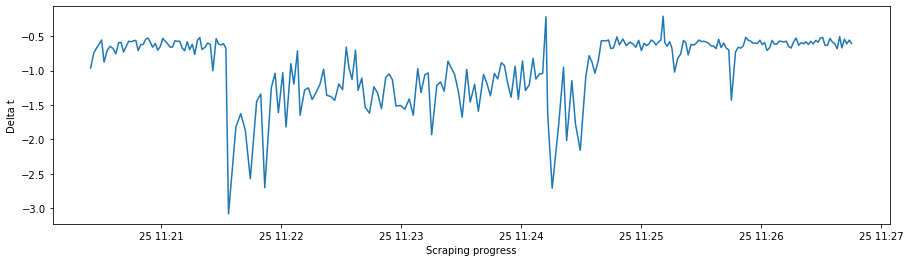

In [16]:
# Plot the time it took to make the call

plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

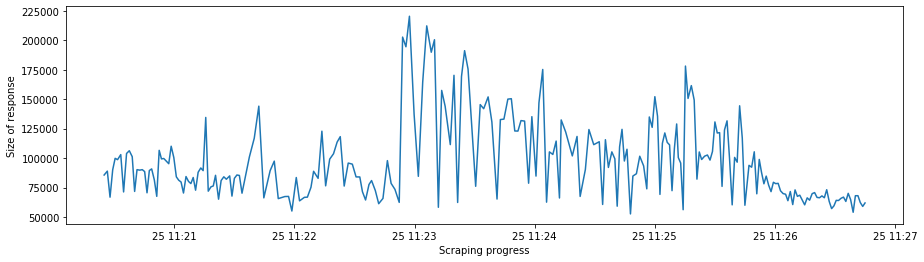

In [17]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_df.dt,log_df.response_size)

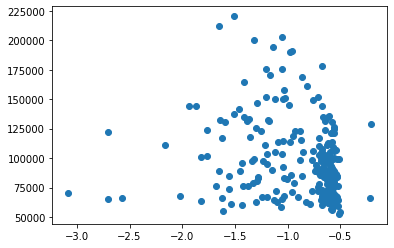

In [18]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_df.delta_t,log_df.response_size)

# -> no clear correlation visible in this case, which might be since download size is not very big

In [19]:
## Investigate errors
log_df.success.value_counts() ## Count errors

print(log_df.success.value_counts())

# -> no errors, all 108 downloads (all True) passed through successfully

## Groupby time
# round the time for aggregation
log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))

print(log_df.groupby('dt_hour').success.mean())



True    250
Name: success, dtype: int64
dt_hour
2019-08-25 11:00:00.000000000    True
2019-08-25 11:00:00.000000001    True
2019-08-25 11:00:00.000000005    True
2019-08-25 11:00:00.000000010    True
2019-08-25 11:00:00.000000015    True
2019-08-25 11:00:00.000000017    True
2019-08-25 11:00:00.000000019    True
2019-08-25 11:00:00.000000024    True
2019-08-25 11:00:00.000000040    True
2019-08-25 11:00:00.000000041    True
2019-08-25 11:00:00.000000050    True
2019-08-25 11:00:00.000000061    True
2019-08-25 11:00:00.000000074    True
2019-08-25 11:00:00.000000086    True
2019-08-25 11:00:00.000000094    True
2019-08-25 11:00:00.000000095    True
2019-08-25 11:00:00.000000097    True
2019-08-25 11:00:00.000000099    True
2019-08-25 11:00:00.000000108    True
2019-08-25 11:00:00.000000115    True
2019-08-25 11:00:00.000000119    True
2019-08-25 11:00:00.000000121    True
2019-08-25 11:00:00.000000125    True
2019-08-25 11:00:00.000000126    True
2019-08-25 11:00:00.000000130    True
20